# **Section 6: Project: Facial expression recognition**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/

Mounted at /content/drive
/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression


In [3]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
'''
In this section, I will use a LogisticRegression class, which can do
both L1 and L2 regularization (even at the same time ~ elastic net)
'''
class LogisticRegression:
  def __init__(self,L1=0.0,L2=0.0):
    self.L1 = L1
    self.L2 = L2

  def add_ones(self,X):
    if X.ndim == 1:
      X.shape = [1,X.shape[0]]
    return np.column_stack( (np.ones(X.shape[0]),X) )

  def fit(self,X,t,learning_rate=0.1,max_iter=1000):
    # Add a column of ones
    Xb = self.add_ones(X)
    # randomly initialize weights
    D = Xb.shape[1]
    self.w = np.random.randn(D) / np.sqrt(D)
    self.w[0] = 0
    # passing objective function and gradient as a lambda to gradient descent function
    J = lambda w : cross_entropy(t, sigmoid(Xb @ w) ) #+ self.L1 * np.abs(w).mean() + 0.5 * self.L2 * (w.T @ w)
    gradient = lambda w : Xb.T @ (sigmoid(Xb @ w) - t) #+ self.L1 * np.sign(w) + self.L2 * w
    self.w, self.cost = gradient_descent(self.w,J,gradient,learning_rate,max_iter)
    
  def forward(self,X):
    # Add a column of ones
    return sigmoid(X @ self.w)

  # Just to have the usual predict method as well
  def predict(self,X):
    Xb = self.add_ones(X)
    return np.round(self.forward(Xb))

  def score(self,X,t):
    return np.mean( t == self.predict(X) )

In [5]:
def get_binary_data():
  X = []
  Y = []
  first = True

  for line in open("../Datasets/icml_face_data.csv"):
    if first:
      first = False
    else:
      row = line.split(',')
      y = int(row[0])
      if y == 0 or y == 1:
        Y.append(y)
        X.append([int(p) for p in row[2].split()])

  X = np.array(X) / 255.
  Y = np.array(Y)

  return X, Y

In [6]:
X,Y = get_binary_data()

In [7]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, 0.3)

# Rebalancing classes
# Here, I did the rebalancing after the splitting,
# in order to avoid having the same samples in both the train test set
X0_train = X_train[Y_train==0]
X1_train = X_train[Y_train==1]

X1_train = np.repeat(X1_train,9,axis=0)

X_train = np.vstack((X0_train,X1_train))
Y_train = np.array([0]*len(X0_train) + [1]*len(X1_train))

# also in the test set
X0_test = X_test[Y_test==0]
X1_test = X_test[Y_test==1]

X1_test = np.repeat(X1_test,9,axis=0)

X_test = np.vstack((X0_test,X1_test))
Y_test = np.array([0]*len(X0_test) + [1]*len(X1_test))

0.6576486305945224

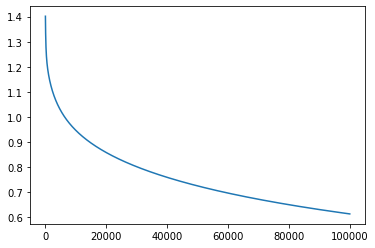

In [8]:
model = LogisticRegression(L1=0.0,L2=0.0)

model.fit(X_train,Y_train,learning_rate=10e-7,max_iter=100000)

plt.plot(model.cost)

model.score(X_test,Y_test)

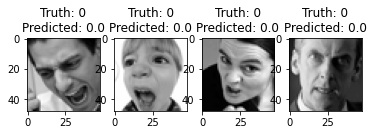

In [19]:
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(X_test[i].reshape(48,48),cmap='gray')
  plt.title("Truth: "+str(Y_test[i])+"\nPredicted: "+str(model.predict(X_test[i])[0]));

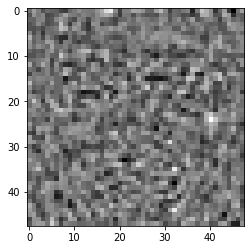

In [10]:
# displaying weights
plt.imshow(model.w[1:].reshape(48,48),cmap='gray');